In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import sweetviz


In [2]:
from datetime import datetime as dt
from sklearn import metrics
import seaborn as sns

In [3]:
features=pd.read_csv('C:/Users/kalya/Documents/capstone/features.csv',parse_dates=['Date'])
train=pd.read_csv('C:/Users/kalya/Documents/capstone/train.csv',parse_dates=['Date'])
stores=pd.read_csv('C:/Users/kalya/Documents/capstone/stores.csv')

In [5]:
store=pd.merge(features,stores,on=['Store'])
store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [113]:
store.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [114]:
store.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [115]:
store.to_csv('all_features.csv',index=False)

In [8]:
train_data=pd.merge(train,store,on=['Date','Store','IsHoliday'])
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [117]:
train_data.shape

(421570, 11)

In [9]:
y = []
m = []
d = []
for i in train_data['Date']:
    y.append(i.year)
    m.append(i.month)
    d.append(i.day)

In [10]:
train_data['Year'] = pd.Series(y)
train_data['Month'] = pd.Series(m)
train_data['Day'] = pd.Series(d)

In [13]:
#train_data.drop('Date',axis=1,inplace=True)

In [120]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


In [11]:
NumericVariable_Names=[key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
CategoricalVariable_Names=[key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['object', 'O','bool']]

In [12]:
NumericVariable_Names

['Store',
 'Dept',
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size',
 'Year',
 'Month',
 'Day']

In [13]:
CategoricalVariable_Names

['IsHoliday', 'Type']

In [14]:
Numeric_data=train_data[NumericVariable_Names]
Numeric_data.head(5)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Day
0,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,2010,2,5
1,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,2010,2,5
2,1,3,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,2010,2,5
3,1,4,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,2010,2,5
4,1,5,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,2010,2,5


In [15]:
# Replace negative and 0 as missing
pd.set_option('mode.chained_assignment', None) # For SettingWithCopyWarning
Numeric_data[Numeric_data<=0]=np.NaN

In [16]:
Categorical=train_data[CategoricalVariable_Names]
Categorical.head(5)

,IsHoliday,Type
0,False,A
1,False,A
2,False,A
3,False,A
4,False,A


Data Audit report

In [17]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

Numeric_data.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,0.575900,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,0.688925,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,420212.0,1358.0,6.737307e+09,16033.114591,7661.70000,22729.492116,5.166298e+08,1.417659,0.010,7.440000,67.551000,311.186000,2120.130000,7661.70000,20271.265000,42922.748000,61275.522000,106566.351400,693099.360000
Temperature,421501.0,69.0,2.533231e+07,60.100233,62.09000,18.432294,3.397495e+02,0.306693,5.540,18.360000,27.310000,33.990000,46.700000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,1.144182,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,109730.0,311840.0,3.710112e+08,3381.128457,203.26000,9532.362243,9.086593e+07,2.819284,0.020,0.300000,3.000000,7.910000,44.200000,203.26000,1991.380000,8716.860000,16590.750000,50366.600000,104519.540000
MarkDown3,136767.0,284803.0,1.973339e+08,1442.847588,24.73000,9634.212338,9.281805e+07,6.677221,0.010,0.150000,0.700000,1.710000,5.160000,24.73000,104.140000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,1.859909,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000
MarkDown5,151432.0,270138.0,7.009750e+08,4628.975079,3359.45000,5962.887455,3.555603e+07,1.288166,135.160,351.970000,715.520000,1070.830000,1878.440000,3359.45000,5563.800000,8337.700000,11269.240000,27754.230000,108519.280000


In [18]:
Numericaldata_summary=Numeric_data.apply(var_summary).T
Numericaldata_summary.to_csv('C:/Users/kalya/Documents/capstone/Numericaldata_summary.csv')

In [19]:
def categorical_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

categorical_summary=Categorical.apply(categorical_summary)

In [20]:
categorical_summary

,IsHoliday,Type
N,421570,421570
NMISS,0,0
ColumnsNames,False 391909 True 29661 Name: IsHolida...,A 215478 B 163495 C 42597 Name: Type...


In [21]:
#Handling Outlier
def outlier(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

Numeric_data=Numeric_data.apply(outlier)

In [22]:
#Handling missing data
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

Numeric_data=Numeric_data.apply(Missing_imputation)

In [23]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [24]:
for c_feature in ['IsHoliday', 'Type']:
    Categorical.loc[:,c_feature] = Categorical[c_feature].astype('category')
    data_cat = create_dummies(Categorical , c_feature )
data_cat.head()

,IsHoliday,Type_B,Type_C
0,False,0,0
1,False,0,0
2,False,0,0
3,False,0,0
4,False,0,0


In [25]:
data = pd.concat([Numeric_data, data_cat], axis=1)
data.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Day,IsHoliday,Type_B,Type_C
0,1,1,24924.50,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,False,0,0
1,1,2,50605.27,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,False,0,0
2,1,3,13740.12,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,False,0,0
3,1,4,39954.04,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,False,0,0
4,1,5,32229.38,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,151315,2010,2,5,False,0,0


Lets see how is weekly sales related to rest of the coulmns by plotting weekly sales on the y axis and the other columns on x axis.

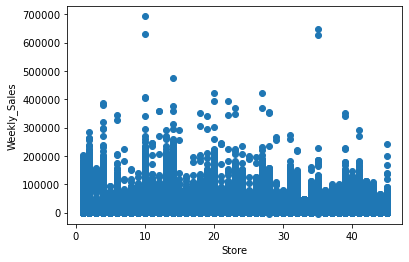

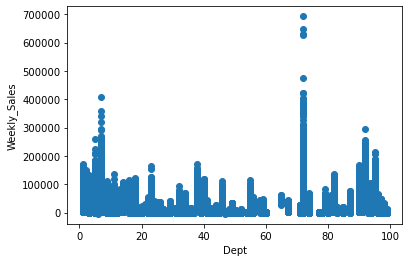

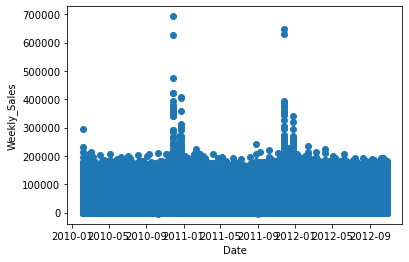

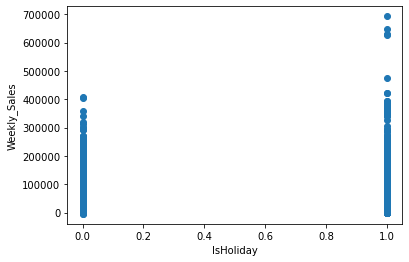

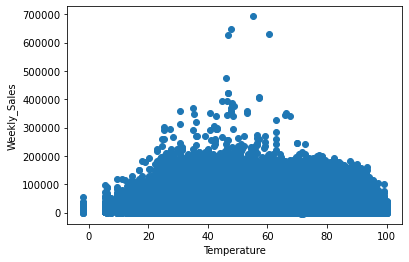

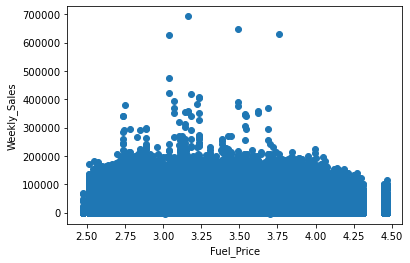

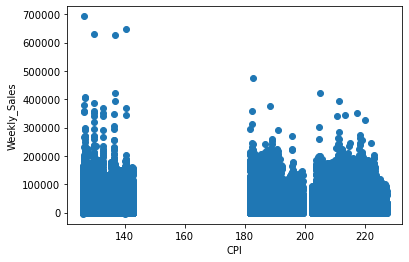

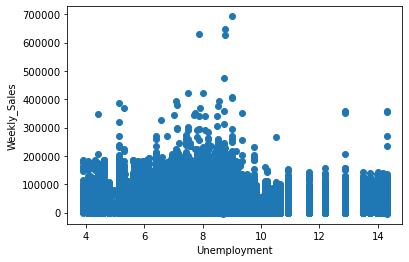

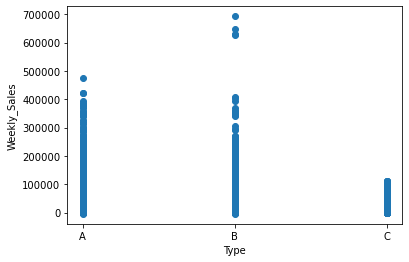

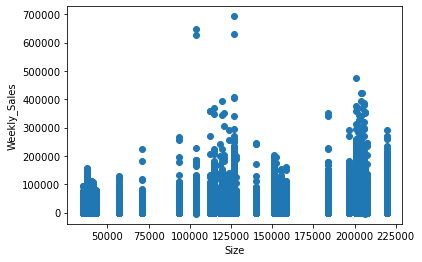

In [67]:
 def scatter_plots(dataset, column):
     plt.figure()
     plt.scatter(dataset[column], dataset['Weekly_Sales'])
     plt.xlabel(column)
     plt.ylabel('Weekly_Sales')
    
 scatter_plots(train_data, 'Store')    
 scatter_plots(train_data, 'Dept')   
 scatter_plots(train_data, 'Date')
 scatter_plots(train_data, 'IsHoliday')    
 scatter_plots(train_data, 'Temperature')    
 scatter_plots(train_data, 'Fuel_Price')  
 scatter_plots(train_data, 'CPI')
 scatter_plots(train_data, 'Unemployment')
 scatter_plots(train_data, 'Type')
 scatter_plots(train_data, 'Size')

In [29]:
my_report = sweetviz.analyze([train_data, "Train"])

In [30]:
# correlation matrix (ranges from 1 to -1)
correlation_matrix=data.corr()
correlation_matrix.to_csv('C:/Users/kalya/Documents/capstone/corrm.csv')
correlation_matrix

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Day,Type_B,Type_C
Store,1.000000,0.024011,-0.083732,-0.052251,0.064984,-0.210949,0.208671,-0.182881,0.002997,0.001011,-0.000015,-0.233461,0.439004
Dept,0.024011,1.000000,0.143319,0.004383,0.003514,-0.007483,0.007874,-0.003022,0.003688,0.000894,-0.000664,-0.029920,0.028344
Weekly_Sales,-0.083732,0.143319,1.000000,0.000576,0.001502,-0.022807,-0.025323,0.252590,-0.009287,0.025578,-0.007982,-0.134705,-0.099054
Temperature,-0.052251,0.004383,0.000576,1.000000,0.142011,0.184608,0.095511,-0.059287,0.066476,0.234499,0.025848,-0.107740,0.135709
Fuel_Price,0.064984,0.003514,0.001502,0.142011,1.000000,-0.162609,-0.034938,0.004468,0.780315,-0.042186,0.028013,0.037372,0.001369
CPI,-0.210949,-0.007483,-0.022807,0.184608,-0.162609,1.000000,-0.300190,-0.003307,0.074335,0.005130,0.002701,-0.081883,-0.006557
Unemployment,0.208671,0.007874,-0.025323,0.095511,-0.034938,-0.300190,1.000000,-0.068099,-0.236754,-0.012963,-0.003802,-0.013574,0.175291
Size,-0.182881,-0.003022,0.252590,-0.059287,0.004468,-0.003307,-0.068099,1.000000,-0.004975,-0.001210,-0.000386,-0.455646,-0.528852
Year,0.002997,0.003688,-0.009287,0.066476,0.780315,0.074335,-0.236754,-0.004975,1.000000,-0.194288,0.005835,-0.000732,0.005244
Month,0.001011,0.000894,0.025578,0.234499,-0.042186,0.005130,-0.012963,-0.001210,-0.194288,1.000000,0.016363,0.000019,-0.000092


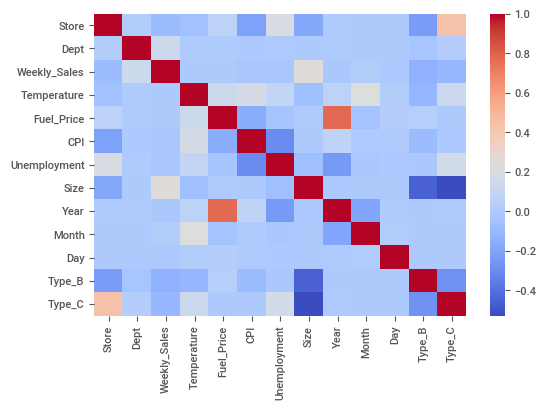

In [31]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data.corr(), cmap = "coolwarm")


In [136]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'Year', 'Month', 'Day', 'IsHoliday', 'Type_B',
       'Type_C'],
      dtype='object')

In [65]:
profile = ProfileReport(train_data, title ='Pandas Profiling Report' , explorative = True)

In [66]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

In [35]:
profile.to_widgets()

In [36]:
my_report = sweetviz.analyze([train_data, "Train"])

In [35]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Model Building

In [26]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Year', 'Month', 'Day', 'IsHoliday', 'Type_B',
       'Type_C'],
      dtype='object')

In [37]:
# Cyclical encoding for the dates
# As the data is Time-Series we sort them in ascending order so that the model can perform on the historical data.
train_data = train_data.sort_values(by='Date', ascending=True)

#Convert the Date columns to Week#, Month and Year. And since week# and month are cyclical features we will handle 
#them accordingly.
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year
train_data['Week'] = train_data['Date'].dt.week
train_data['month_sin'] = np.sin((train_data.Month-1)*(2.*np.pi/12))
train_data['month_cos'] = np.cos((train_data.Month-1)*(2.*np.pi/12))
train_data['week_sin'] = np.sin((train_data.Week-1)*(2.*np.pi/52.1429))
train_data['week_cos'] = np.cos((train_data.Week-1)*(2.*np.pi/52.1429))
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,Week,month_sin,month_cos,week_sin,week_cos
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,0.5,0.866025,0.46355,0.886071
330761,35,3,2010-02-05,14612.19,False,27.19,2.784,135.352461,9.262,B,103681,2010,2,5,5,0.5,0.866025,0.46355,0.886071
330762,35,4,2010-02-05,26323.15,False,27.19,2.784,135.352461,9.262,B,103681,2010,2,5,5,0.5,0.866025,0.46355,0.886071
330763,35,5,2010-02-05,36414.63,False,27.19,2.784,135.352461,9.262,B,103681,2010,2,5,5,0.5,0.866025,0.46355,0.886071
330764,35,6,2010-02-05,11437.81,False,27.19,2.784,135.352461,9.262,B,103681,2010,2,5,5,0.5,0.866025,0.46355,0.886071


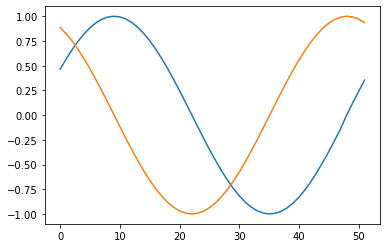

In [69]:
test1 = pd.DataFrame(train_data['week_sin'].unique())
test2 = pd.DataFrame(train_data['week_cos'].unique())
plt.plot(test1)
plt.plot(test2)
plt.show()

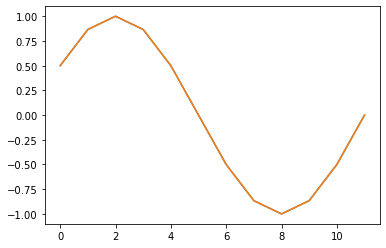

In [70]:
test1 = pd.DataFrame(train_data['month_sin'].unique())
test2 = pd.DataFrame(train_data['month_sin'].unique())
plt.plot(test1)
plt.plot(test2)
plt.show()

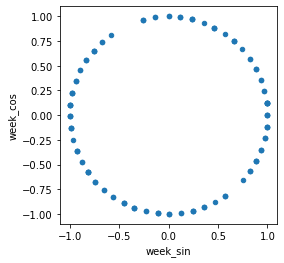

In [71]:
train_data.sample(144).plot.scatter('week_sin','week_cos').set_aspect('equal');

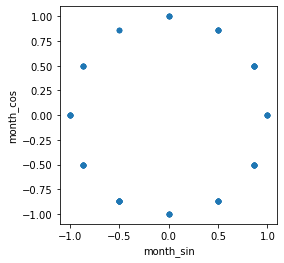

In [72]:
train_data.sample(144).plot.scatter('month_sin','month_cos').set_aspect('equal');

In [27]:
X=data[data.columns.difference(['Weekly_Sales'])]
y=data['Weekly_Sales']

In [40]:
import statsmodels.formula.api as smf
lm=smf.ols('Weekly_Sales~Store+Dept+Temperature+Fuel_Price+CPI+Unemployment+Size+Year+Month+Day+IsHoliday++Type_C', data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3565.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:21:37   Log-Likelihood:            -4.7688e+06
No. Observations:              421570   AIC:                         9.538e+06
Df Residuals:                  421557   BIC:                         9.538e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.153e+05   1.41e+0

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
clf = LinearRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_train)
y_pred_linear=clf.predict(X_test)
acc_linear=round( clf.score(X_train, y_train)*100, 2)
test_linear = round(clf.score(X_test, y_test)*100, 2)
print ('Train:'+str(acc_linear) + ' percent')
print('Test:'+str(test_linear)+ ' percent')


Train:9.16 percent
Test:9.32 percent


# PCA with Linear Regression

In [32]:
data.dtypes

Store              int64
Dept               int64
Weekly_Sales     float64
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
Size               int64
Year               int64
Month              int64
Day                int64
IsHoliday       category
Type_B             uint8
Type_C             uint8
dtype: object

In [36]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
train = data.iloc[:282451]
test = data.iloc[282451:]
test = test.drop('Weekly_Sales',axis=1) #removing unusable values from test

#creating numpy arrays out of the pandas dataframe; we can ask for a columns, or dataframes values

Y = train['Weekly_Sales']
X = train.drop('Weekly_Sales',axis=1)


In [37]:
lr = linear_model.LinearRegression()
lr.fit(X, Y)

Y_pred = lr.predict(X)

In [38]:
#MSE
mse1 = np.sqrt(round(metrics.mean_squared_error(Y_pred,Y),3))
print('MSE for Model 1 is:',mse1)

#R^2 
r2 = metrics.r2_score(Y,Y_pred)
print('R\N{SUPERSCRIPT TWO} for Model 1 is:',r2)

MSE for Model 1 is: 20843.983559531032
R² for Model 1 is: 0.08430227546680857


NameError: name 'data_transform' is not defined

In [36]:
data.drop('Type_B',axis=1,inplace=True)

In [30]:
X=data[data.columns.difference(['Weekly_Sales'])]
y=data['Weekly_Sales']

Split Test and Train data

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.fit_transform(X_test)

RScaler = RobustScaler()
X_train = RScaler.fit_transform(X_train)
X_test = RScaler.fit_transform(X_test)

norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

NameError: name 'X_train' is not defined

Observations: Feature scaling didn't reduce the weighted mean absolute error (WMAE) and hence is not required.

# Model building

In [39]:
import statsmodels.formula.api as smf
lm=smf.ols('Weekly_Sales~Store+Dept+Temperature+Fuel_Price+CPI+Unemployment+Size+Year+Month+Day+IsHoliday++Type_C', data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3565.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:26:32   Log-Likelihood:            -4.7688e+06
No. Observations:              421570   AIC:                         9.538e+06
Df Residuals:                  421557   BIC:                         9.538e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.153e+05   1.41e+0

# Keras regression

In [80]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [81]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1, input_dim=12))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])
    return regressor

In [82]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=256,epochs=10)

In [89]:
#X_train=np.asarray(X).astype(np.float32)
#y_train=np.asarray(y).astype(np.float32)
regressor.fit(X_train,y_train)

Epoch 1/10


ValueError: in user code:

    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 12 but received input with shape [None, 13]


In [ ]:
pred= regressor.predict(X_train)
y_pred= regressor.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred)

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_predict

In [53]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [54]:
pred=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

In [55]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9080.718350853045
Mean Squared Error: 190622306.5902714
Root Mean Squared Error: 13806.603731195859


In [56]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9159.592261536627
Mean Squared Error: 194472045.6673119
Root Mean Squared Error: 13945.323433585609


In [57]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.555908446401461
R-squared for Test: 0.5545641964193873


# Tuning a regression tree

In [58]:
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier 

# list of values to try
max_depth_range = range(5, 15)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)
    
    MSE_scores = cross_val_score(treereg, X_train, y_train, scoring='neg_mean_squared_error')
    
    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

In [59]:
print (RMSE_Scores)

[13819.644812475695, 10978.510080619997, 10031.318863616385, 9126.376941685647, 8261.313916900912, 7323.098203663705, 6485.737911664008, 5813.623277013086, 5247.517619108691, 4773.958399200534]


Text(0, 0.5, 'RMSE (lower is better)')

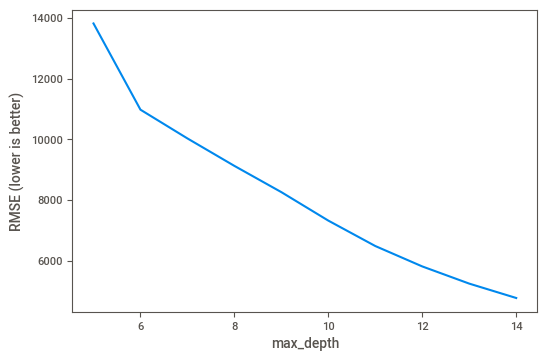

In [60]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

# Building Final Decision Tree Model

In [61]:
# max_depth=11 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=14, random_state=345)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, random_state=345)

In [62]:
treereg.feature_importances_

array([2.18461265e-02, 7.25398089e-03, 6.85151768e-01, 1.27902386e-03,
       1.14261718e-03, 1.61959306e-02, 1.83871177e-01, 5.52512604e-02,
       5.47414116e-03, 1.39127867e-02, 2.27249075e-03, 6.00337320e-03,
       3.45324537e-04])

In [51]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':data.columns.difference(['Weekly_Sales']), 'importance':treereg.feature_importances_})

,feature,importance
0,CPI,0.021428
1,Day,0.006956
2,Dept,0.683763
3,Fuel_Price,0.001379
4,IsHoliday,0.001527
5,Month,0.016136
6,Size,0.189186
7,Store,0.055880
8,Temperature,0.005468
9,Type_C,0.012003


# Tree Diagram

In [94]:
# create a Graphviz file

from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file= 'tree.png', feature_names=data.columns.difference(['Weekly_Sales']))



# Making Prediction

In [95]:
pred=treereg.predict(X_train)
y_pred=treereg.predict(X_test)

In [96]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2160.2140739894103
Mean Squared Error: 17954089.475332014
Root Mean Squared Error: 4237.226625439335


In [97]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2370.1811165677445
Mean Squared Error: 21562194.389050484
Root Mean Squared Error: 4643.510998054218


In [98]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9583866111018051
R-squared for Test: 0.9506120617403343


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=20, random_state=0)  
rfr.fit(X_train, y_train)  
pred = rfr.predict(X_train)

In [35]:
y_pred= rfr.predict(X_test)

In [36]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9078.499748769847
Mean Squared Error: 190507692.51954427
Root Mean Squared Error: 13802.452409609832


In [37]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9157.478038198773
Mean Squared Error: 194345735.30215043
Root Mean Squared Error: 13940.793926536266


In [46]:
from sklearn.metrics import r2_score
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.556175462060037
R-squared for Test: 0.5548535087409254


# Tuning a random forest

In [40]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid={'max_depth': range(8,15),
            'n_estimators': (10, 50)}

In [42]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)

In [48]:
grid_result.best_score_

0.959406174558095

In [49]:
grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

# Building Final Random Forest Model

In [50]:
rfr = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=50, random_state=0)

In [51]:
pred = rfr.predict(X_train)
y_pred = rfr.predict(X_test)

In [52]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 1927.2705271465018
Mean Squared Error: 13335857.382496862
Root Mean Squared Error: 3651.8293200116655


In [53]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2163.2120528704822
Mean Squared Error: 17361889.98198876
Root Mean Squared Error: 4166.760130123735


In [54]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.968931539390659
R-squared for Test: 0.9602328067806958


# Keras Regression

In [55]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [56]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1, input_dim=12))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])
    return regressor

In [57]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=256,epochs=10)

In [58]:
results=regressor.fit(X_train,y_train)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [59]:
pred= regressor.predict(X_train)
y_pred= regressor.predict(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [76]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9113.460578665334
Mean Squared Error: 191174213.57522035
Root Mean Squared Error: 13826.57635046436


In [62]:
import pickle
# Saving model to disk of random forest
pickle.dump(rfr, open('model.pkl','wb'))

In [64]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[211.0963582,5,1,2.572,0,2,151315,1,42.31,0,8.106,2010]])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([24195.97538878])